In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import torchvision.datasets as datasets

SEED = 309
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [2]:
cherry_path = 'train_data_no_removal/cherry'
strawberry_path = 'train_data_no_removal/strawberry'
tomato_path = 'train_data_no_removal/tomato'

In [3]:
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
])

In [4]:
data_dir = "train_data_no_removal"

In [5]:
from torch.utils.data import random_split

dataset = datasets.ImageFolder(root=data_dir, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

batch_size = 64 # dec
num_workers = 4# dec

#dec num workers

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

In [6]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1) 
        x = torch.relu(self.fc1(x))    
        x = self.fc2(x)               
        return x

cuda
Epoch [1/10], Train Accuracy: 0.3955, Test Accuracy: 0.4203
Epoch [2/10], Train Accuracy: 0.4688, Test Accuracy: 0.4939
Epoch [3/10], Train Accuracy: 0.4849, Test Accuracy: 0.4348
Epoch [4/10], Train Accuracy: 0.4535, Test Accuracy: 0.4058
Epoch [5/10], Train Accuracy: 0.5081, Test Accuracy: 0.4359
Epoch [6/10], Train Accuracy: 0.5176, Test Accuracy: 0.3902
Epoch [7/10], Train Accuracy: 0.5167, Test Accuracy: 0.4771
Epoch [8/10], Train Accuracy: 0.4983, Test Accuracy: 0.4069
Epoch [9/10], Train Accuracy: 0.5510, Test Accuracy: 0.4749
Epoch [10/10], Train Accuracy: 0.5527, Test Accuracy: 0.4136


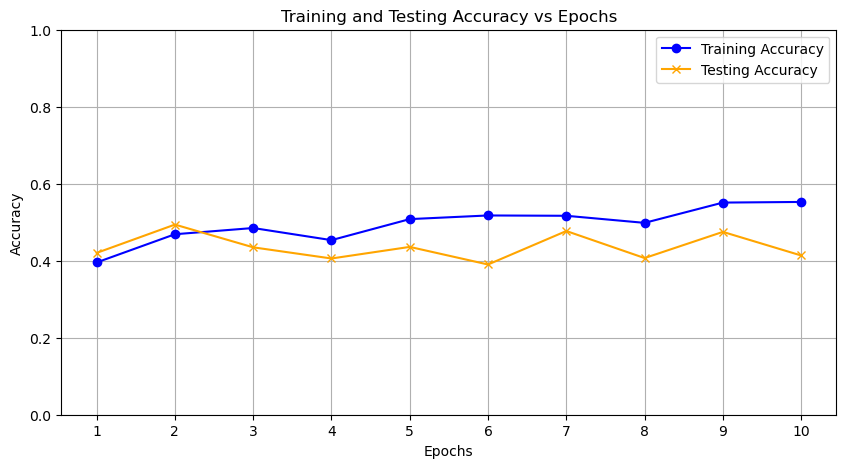

In [7]:
# Set device
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

print(device)

# Define number of classes
num_classes = 3  # cherry, strawberry, tomato

# Define hyperparameters
input_size = 100 * 100 * 3  # Flattened image size
num_epochs = 10  # Number of epochs for training
learning_rate = 0.001

# Initialize model, loss function, and optimizer
model = SimpleNN(input_size=input_size, num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training and testing accuracy storage
train_set_scores = []
test_set_scores = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    
    # Training step
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = correct / total
    train_set_scores.append(train_accuracy)

    # Testing step (evaluation)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    test_set_scores.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plotting
epochs = list(range(1, num_epochs + 1))

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_set_scores, label='Training Accuracy', marker='o', color='blue')
plt.plot(epochs, test_set_scores, label='Testing Accuracy', marker='x', color='orange')

plt.title('Training and Testing Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0, 1)  # Adjusted range to display accuracies correctly
plt.grid()
plt.legend()
plt.show()

In [8]:
from tqdm.notebook import tqdm, trange

cuda


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.4604, Test Accuracy: 0.5273


Training:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch [2/10], Train Accuracy: 0.5691, Test Accuracy: 0.5184


Training:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch [3/10], Train Accuracy: 0.5532, Test Accuracy: 0.5585


Training:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch [4/10], Train Accuracy: 0.5942, Test Accuracy: 0.5786


Training:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch [5/10], Train Accuracy: 0.6037, Test Accuracy: 0.5875


Training:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch [6/10], Train Accuracy: 0.5978, Test Accuracy: 0.5574


Training:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch [7/10], Train Accuracy: 0.6009, Test Accuracy: 0.4604


Training:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch [8/10], Train Accuracy: 0.6190, Test Accuracy: 0.5808


Training:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch [9/10], Train Accuracy: 0.6260, Test Accuracy: 0.6198


Training:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch [10/10], Train Accuracy: 0.6491, Test Accuracy: 0.6522


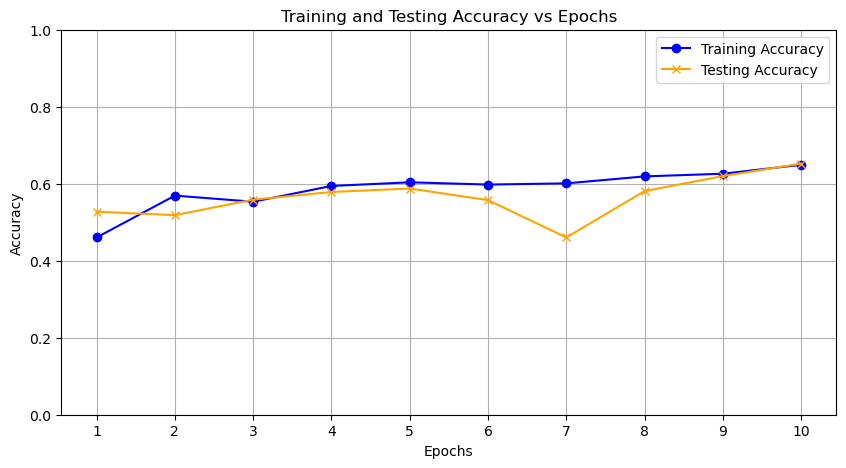

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Paths to image data
data_dir = "train_data_no_removal"

# Image transformations
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
])

# Load dataset and split into training and testing sets
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Data loaders
batch_size = 64
num_workers = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

# Define CNN model using Sequential
model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Flatten(),
    nn.Linear(128 * 12 * 12, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 3)  # 3 classes: cherry, strawberry, tomato
)

# Move model to device
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')
    
print(device)
    
model = model.to(device)

# Hyperparameters
num_epochs = 10
learning_rate = 0.001

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training and testing accuracy storage
train_set_scores = []
test_set_scores = []

# Training loop
for epoch in trange(num_epochs, desc='Epoch'):
    model.train()
    correct = 0
    total = 0

    # Training step
    for images, labels in tqdm(train_loader, desc='Training'):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = correct / total
    train_set_scores.append(train_accuracy)

    # Testing step (evaluation)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    test_set_scores.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plotting the training and testing accuracy over epochs
epochs = list(range(1, num_epochs + 1))
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_set_scores, label='Training Accuracy', marker='o', color='blue')
plt.plot(epochs, test_set_scores, label='Testing Accuracy', marker='x', color='orange')
plt.title('Training and Testing Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()


Using device: cuda
Training with Batch Learning...


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.3866, Test Accuracy: 0.4693
Epoch [2/10], Train Accuracy: 0.5220, Test Accuracy: 0.5095
Epoch [3/10], Train Accuracy: 0.5596, Test Accuracy: 0.5942
Epoch [4/10], Train Accuracy: 0.5700, Test Accuracy: 0.5987
Epoch [5/10], Train Accuracy: 0.5953, Test Accuracy: 0.5396
Epoch [6/10], Train Accuracy: 0.6112, Test Accuracy: 0.6210
Epoch [7/10], Train Accuracy: 0.6185, Test Accuracy: 0.5909
Epoch [8/10], Train Accuracy: 0.6564, Test Accuracy: 0.6722
Epoch [9/10], Train Accuracy: 0.6714, Test Accuracy: 0.6377
Epoch [10/10], Train Accuracy: 0.7163, Test Accuracy: 0.6020


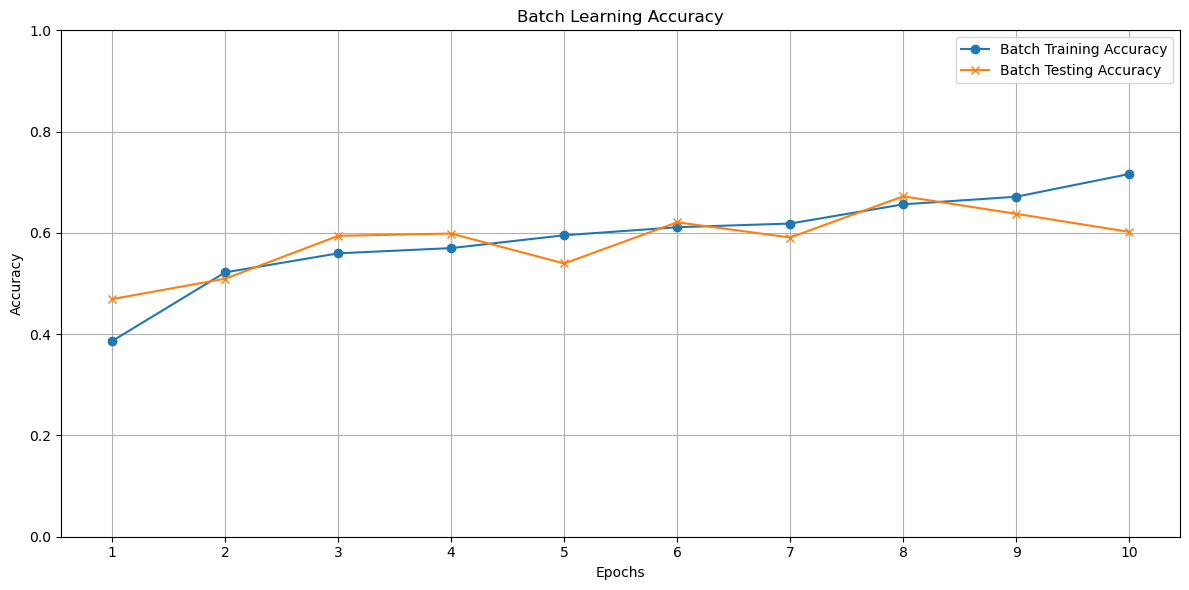

In [11]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from tqdm.notebook import tqdm

# Set random seeds for reproducibility
SEED = 309
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# Paths to image data
data_dir = "train_data_no_removal"

# Image transformations
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
])

# Load dataset and split into training and testing sets
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Data loaders
batch_size = 64
num_workers = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

# Define CNN model using Sequential
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    nn.Flatten(),
    nn.Linear(128 * 12 * 12, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 3)  # 3 classes: cherry, strawberry, tomato
)

# Function to train and evaluate the model
def train_and_evaluate(model, train_loader, test_loader, num_epochs=10, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_set_scores = []
    test_set_scores = []

    for epoch in tqdm(range(num_epochs), desc='Training'):
        model.train()
        correct = 0
        total = 0
        
        # Training step
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = correct / total
        train_set_scores.append(train_accuracy)

        # Testing step
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = correct / total
        test_set_scores.append(test_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return train_set_scores, test_set_scores

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Batch Learning
batch_model = model.to(device)  # Use the Sequential model for batch learning
print("Training with Batch Learning...")
batch_train_scores, batch_test_scores = train_and_evaluate(batch_model, train_loader, test_loader, num_epochs=10)

# Plotting comparison
epochs = list(range(1, 11))  # Assuming num_epochs is 10

plt.figure(figsize=(12, 6))

# Batch Learning
plt.plot(epochs, batch_train_scores, label='Batch Training Accuracy', marker='o')
plt.plot(epochs, batch_test_scores, label='Batch Testing Accuracy', marker='x')
plt.title('Batch Learning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0, 1)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

Using device: cuda


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.4284, Test Accuracy: 0.5151
Epoch [2/10], Train Accuracy: 0.5418, Test Accuracy: 0.5886
Epoch [3/10], Train Accuracy: 0.5828, Test Accuracy: 0.6087
Epoch [4/10], Train Accuracy: 0.5995, Test Accuracy: 0.6522
Epoch [5/10], Train Accuracy: 0.6572, Test Accuracy: 0.6901
Epoch [6/10], Train Accuracy: 0.6878, Test Accuracy: 0.7224
Epoch [7/10], Train Accuracy: 0.7244, Test Accuracy: 0.7213
Epoch [8/10], Train Accuracy: 0.7740, Test Accuracy: 0.7581
Epoch [9/10], Train Accuracy: 0.8066, Test Accuracy: 0.8082
Epoch [10/10], Train Accuracy: 0.8609, Test Accuracy: 0.8651


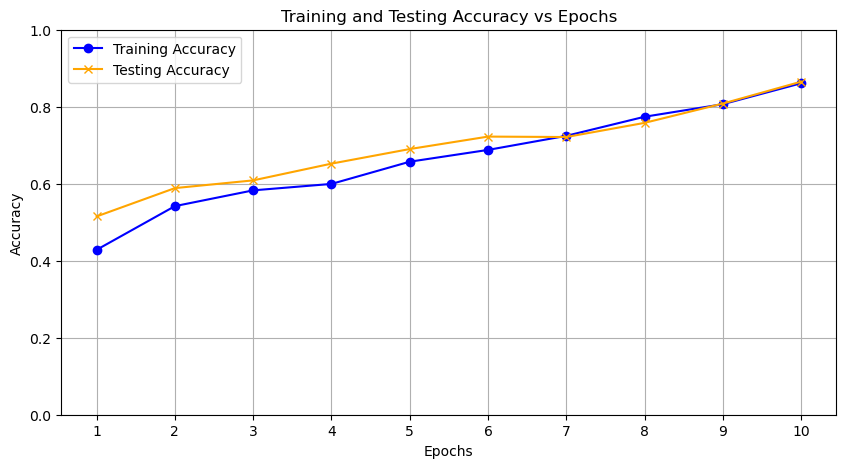

In [14]:
# Data loaders
batch_size = 64
num_workers = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

# Define CNN model using Sequential
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 12 * 12, 512)
        self.fc2 = nn.Linear(512, 3)  # 3 classes: cherry, strawberry, tomato

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Initialize model
model = CNN().to(device)

# Hyperparameters
num_epochs = 10
learning_rate = 0.001

# Define the loss function
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training and testing accuracy storage
train_set_scores = []
test_set_scores = []

# Training loop
for epoch in tqdm(range(num_epochs), desc='Training'):
    model.train()
    correct = 0
    total = 0

    # Training step
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update weights

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = correct / total
    train_set_scores.append(train_accuracy)

    # Testing step (evaluation)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    test_set_scores.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plotting the training and testing accuracy over epochs
epochs = list(range(1, num_epochs + 1))
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_set_scores, label='Training Accuracy', marker='o', color='blue')
plt.plot(epochs, test_set_scores, label='Testing Accuracy', marker='x', color='orange')
plt.title('Training and Testing Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()

Using device: cuda

Training with batch size: 16


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.3790, Test Accuracy: 0.4671
Epoch [2/10], Train Accuracy: 0.5231, Test Accuracy: 0.5886
Epoch [3/10], Train Accuracy: 0.5741, Test Accuracy: 0.6276
Epoch [4/10], Train Accuracy: 0.5995, Test Accuracy: 0.6276
Epoch [5/10], Train Accuracy: 0.6271, Test Accuracy: 0.6923
Epoch [6/10], Train Accuracy: 0.6603, Test Accuracy: 0.7202
Epoch [7/10], Train Accuracy: 0.7012, Test Accuracy: 0.7425
Epoch [8/10], Train Accuracy: 0.7559, Test Accuracy: 0.7893
Epoch [9/10], Train Accuracy: 0.8152, Test Accuracy: 0.8283
Epoch [10/10], Train Accuracy: 0.8671, Test Accuracy: 0.8729


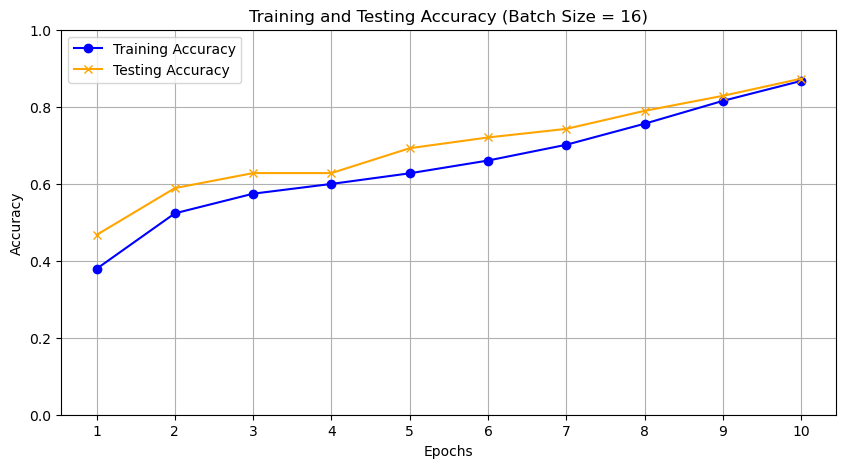


Training with batch size: 32


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.4613, Test Accuracy: 0.4916
Epoch [2/10], Train Accuracy: 0.5426, Test Accuracy: 0.5920
Epoch [3/10], Train Accuracy: 0.5797, Test Accuracy: 0.6176
Epoch [4/10], Train Accuracy: 0.6054, Test Accuracy: 0.5853
Epoch [5/10], Train Accuracy: 0.6210, Test Accuracy: 0.6767
Epoch [6/10], Train Accuracy: 0.6488, Test Accuracy: 0.6689
Epoch [7/10], Train Accuracy: 0.6859, Test Accuracy: 0.6789
Epoch [8/10], Train Accuracy: 0.7138, Test Accuracy: 0.7770
Epoch [9/10], Train Accuracy: 0.7673, Test Accuracy: 0.7949
Epoch [10/10], Train Accuracy: 0.8261, Test Accuracy: 0.8372


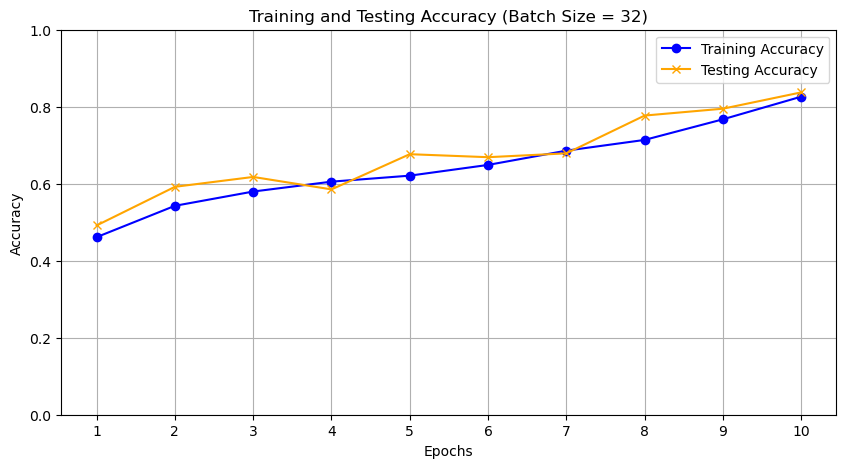


Training with batch size: 64


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.4236, Test Accuracy: 0.5563
Epoch [2/10], Train Accuracy: 0.5465, Test Accuracy: 0.5975
Epoch [3/10], Train Accuracy: 0.5560, Test Accuracy: 0.5831
Epoch [4/10], Train Accuracy: 0.5973, Test Accuracy: 0.5373
Epoch [5/10], Train Accuracy: 0.6171, Test Accuracy: 0.6221
Epoch [6/10], Train Accuracy: 0.6338, Test Accuracy: 0.6711
Epoch [7/10], Train Accuracy: 0.6497, Test Accuracy: 0.6934
Epoch [8/10], Train Accuracy: 0.6839, Test Accuracy: 0.6711
Epoch [9/10], Train Accuracy: 0.7213, Test Accuracy: 0.7793
Epoch [10/10], Train Accuracy: 0.7798, Test Accuracy: 0.8016


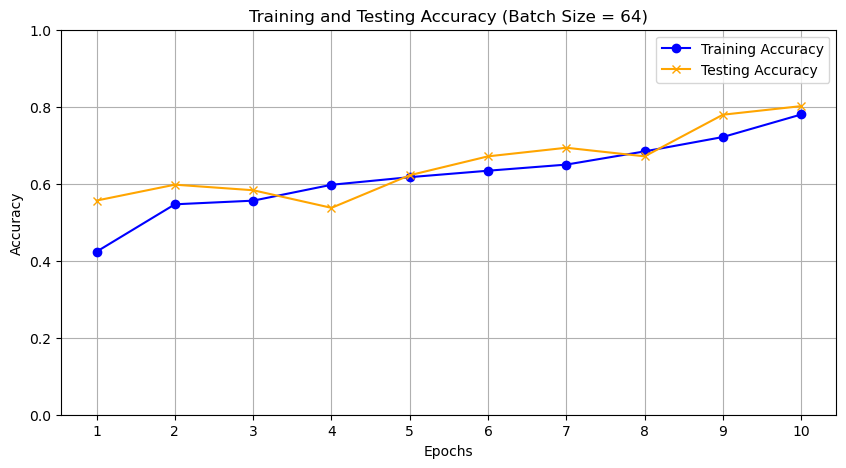


Training with batch size: 128


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.3462, Test Accuracy: 0.3790
Epoch [2/10], Train Accuracy: 0.4089, Test Accuracy: 0.3188
Epoch [3/10], Train Accuracy: 0.4847, Test Accuracy: 0.5117
Epoch [4/10], Train Accuracy: 0.5569, Test Accuracy: 0.5574
Epoch [5/10], Train Accuracy: 0.5577, Test Accuracy: 0.5307
Epoch [6/10], Train Accuracy: 0.5644, Test Accuracy: 0.5953
Epoch [7/10], Train Accuracy: 0.5923, Test Accuracy: 0.5429
Epoch [8/10], Train Accuracy: 0.5970, Test Accuracy: 0.6310
Epoch [9/10], Train Accuracy: 0.6137, Test Accuracy: 0.6466
Epoch [10/10], Train Accuracy: 0.6332, Test Accuracy: 0.6466


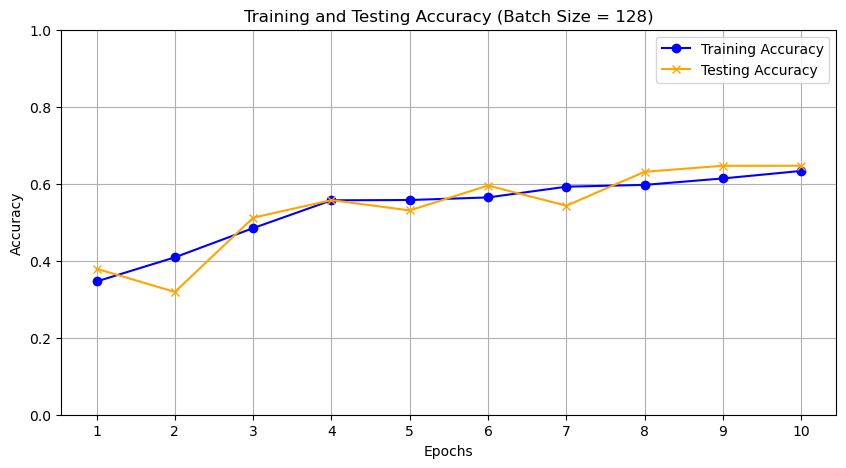

In [15]:
# Define CNN model using Sequential
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 12 * 12, 512)
        self.fc2 = nn.Linear(512, 3)  # 3 classes: cherry, strawberry, tomato

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train and evaluate the model with different minibatch sizes
def train_and_evaluate(model, train_loader, test_loader, num_epochs=10, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_set_scores = []
    test_set_scores = []

    for epoch in tqdm(range(num_epochs), desc='Training'):
        model.train()
        correct = 0
        total = 0
        
        # Training step
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backward pass (compute gradients)
            optimizer.step()  # Update weights

            # Calculate training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = correct / total
        train_set_scores.append(train_accuracy)

        # Testing step
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = correct / total
        test_set_scores.append(test_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return train_set_scores, test_set_scores

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Function to run experiments with different batch sizes
def experiment_with_batch_sizes(batch_sizes, num_epochs=10):
    for batch_size in batch_sizes:
        print(f'\nTraining with batch size: {batch_size}')
        
        # Data loaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

        # Initialize model
        model = CNN().to(device)
        
        # Train and evaluate
        train_scores, test_scores = train_and_evaluate(model, train_loader, test_loader, num_epochs=num_epochs)
        
        # Plotting the training and testing accuracy over epochs for the current batch size
        epochs = list(range(1, num_epochs + 1))
        plt.figure(figsize=(10, 5))
        plt.plot(epochs, train_scores, label='Training Accuracy', marker='o', color='blue')
        plt.plot(epochs, test_scores, label='Testing Accuracy', marker='x', color='orange')
        plt.title(f'Training and Testing Accuracy (Batch Size = {batch_size})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.xticks(epochs)
        plt.ylim(0, 1)
        plt.grid()
        plt.legend()
        plt.show()

# Specify different batch sizes to experiment with
batch_sizes = [16, 32, 64, 128]
experiment_with_batch_sizes(batch_sizes, num_epochs=10)

Using device: cuda

Training with optimizer: SGD


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.3643, Test Accuracy: 0.3645
Epoch [2/10], Train Accuracy: 0.3743, Test Accuracy: 0.3946
Epoch [3/10], Train Accuracy: 0.3955, Test Accuracy: 0.3835
Epoch [4/10], Train Accuracy: 0.4069, Test Accuracy: 0.4370
Epoch [5/10], Train Accuracy: 0.4217, Test Accuracy: 0.4036
Epoch [6/10], Train Accuracy: 0.4278, Test Accuracy: 0.4693
Epoch [7/10], Train Accuracy: 0.4359, Test Accuracy: 0.4526
Epoch [8/10], Train Accuracy: 0.4275, Test Accuracy: 0.4448
Epoch [9/10], Train Accuracy: 0.4465, Test Accuracy: 0.4783
Epoch [10/10], Train Accuracy: 0.4607, Test Accuracy: 0.4894


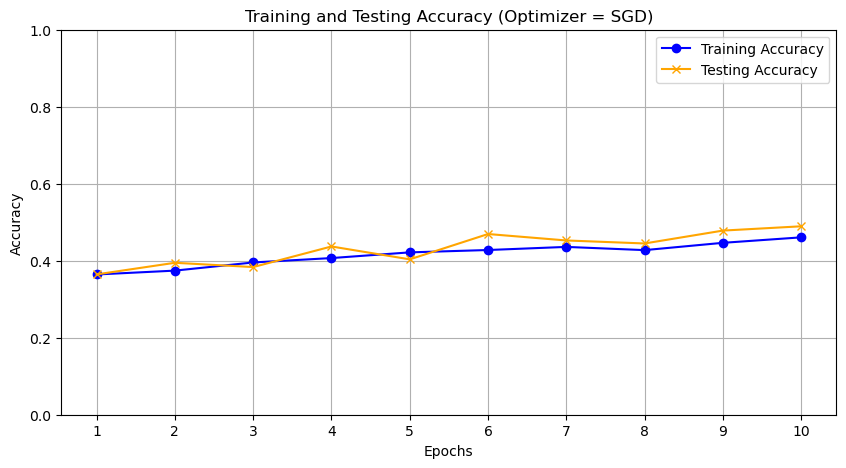


Training with optimizer: Adam


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.4178, Test Accuracy: 0.3545
Epoch [2/10], Train Accuracy: 0.5084, Test Accuracy: 0.4950
Epoch [3/10], Train Accuracy: 0.5454, Test Accuracy: 0.5942
Epoch [4/10], Train Accuracy: 0.5895, Test Accuracy: 0.5753
Epoch [5/10], Train Accuracy: 0.6070, Test Accuracy: 0.6098
Epoch [6/10], Train Accuracy: 0.6268, Test Accuracy: 0.6923
Epoch [7/10], Train Accuracy: 0.6753, Test Accuracy: 0.6812
Epoch [8/10], Train Accuracy: 0.7088, Test Accuracy: 0.6644
Epoch [9/10], Train Accuracy: 0.7411, Test Accuracy: 0.7614
Epoch [10/10], Train Accuracy: 0.7954, Test Accuracy: 0.8071


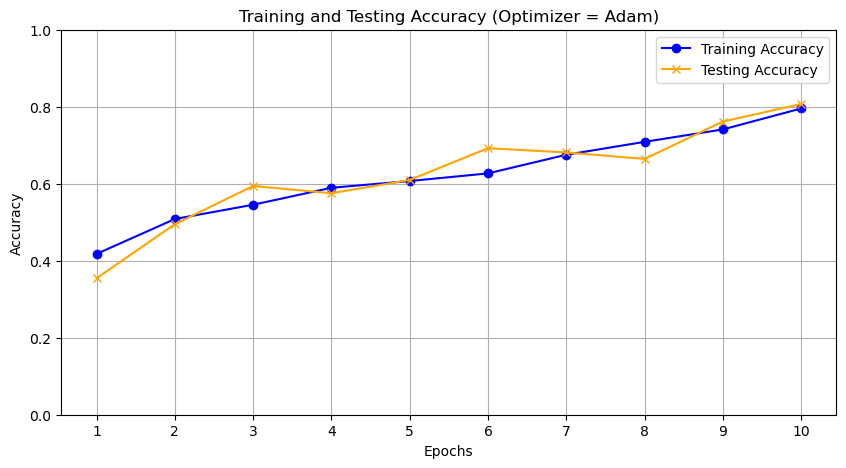


Training with optimizer: RMSprop


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.4178, Test Accuracy: 0.5251
Epoch [2/10], Train Accuracy: 0.5351, Test Accuracy: 0.4693
Epoch [3/10], Train Accuracy: 0.5585, Test Accuracy: 0.3344
Epoch [4/10], Train Accuracy: 0.5870, Test Accuracy: 0.6031
Epoch [5/10], Train Accuracy: 0.6009, Test Accuracy: 0.4771
Epoch [6/10], Train Accuracy: 0.6299, Test Accuracy: 0.5151
Epoch [7/10], Train Accuracy: 0.6313, Test Accuracy: 0.5608
Epoch [8/10], Train Accuracy: 0.6603, Test Accuracy: 0.6511
Epoch [9/10], Train Accuracy: 0.6851, Test Accuracy: 0.5674
Epoch [10/10], Train Accuracy: 0.6870, Test Accuracy: 0.5831


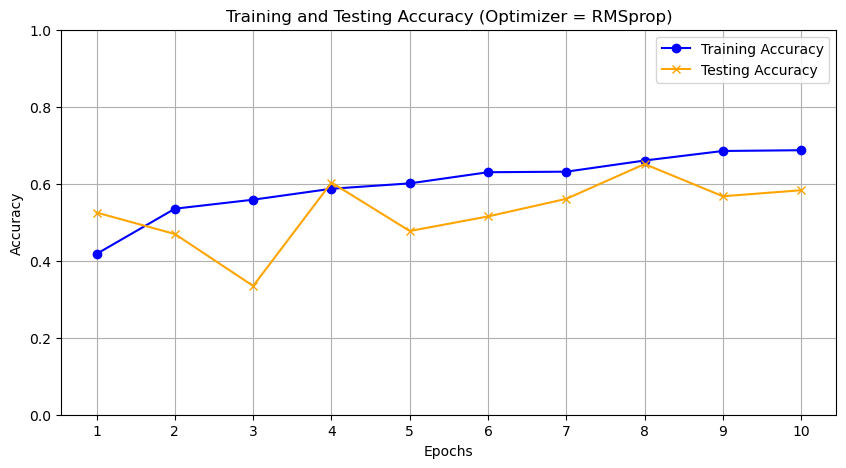

In [16]:
# Define CNN model using Sequential
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 12 * 12, 512)
        self.fc2 = nn.Linear(512, 3)  # 3 classes: cherry, strawberry, tomato

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train and evaluate the model with different optimizers
def train_and_evaluate(model, train_loader, test_loader, optimizer, num_epochs=10, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    
    # Initialize optimizer
    if optimizer == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    elif optimizer == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    else:
        raise ValueError("Optimizer not supported.")

    train_set_scores = []
    test_set_scores = []

    for epoch in tqdm(range(num_epochs), desc='Training'):
        model.train()
        correct = 0
        total = 0
        
        # Training step
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backward pass (compute gradients)
            optimizer.step()  # Update weights

            # Calculate training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = correct / total
        train_set_scores.append(train_accuracy)

        # Testing step
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = correct / total
        test_set_scores.append(test_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return train_set_scores, test_set_scores

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Function to run experiments with different optimizers
def experiment_with_optimizers(optimizers, num_epochs=10):
    for optimizer in optimizers:
        print(f'\nTraining with optimizer: {optimizer}')
        
        # Data loaders
        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
        test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

        # Initialize model
        model = CNN().to(device)
        
        # Train and evaluate
        train_scores, test_scores = train_and_evaluate(model, train_loader, test_loader, optimizer, num_epochs=num_epochs)
        
        # Plotting the training and testing accuracy over epochs for the current optimizer
        epochs = list(range(1, num_epochs + 1))
        plt.figure(figsize=(10, 5))
        plt.plot(epochs, train_scores, label='Training Accuracy', marker='o', color='blue')
        plt.plot(epochs, test_scores, label='Testing Accuracy', marker='x', color='orange')
        plt.title(f'Training and Testing Accuracy (Optimizer = {optimizer})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.xticks(epochs)
        plt.ylim(0, 1)
        plt.grid()
        plt.legend()
        plt.show()

# Specify different optimizers to experiment with
optimizers = ['SGD', 'Adam', 'RMSprop']
experiment_with_optimizers(optimizers, num_epochs=10)

Using device: cuda

Training with activation function: ReLU


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.4543, Test Accuracy: 0.4794
Epoch [2/10], Train Accuracy: 0.5312, Test Accuracy: 0.5284
Epoch [3/10], Train Accuracy: 0.5683, Test Accuracy: 0.6154
Epoch [4/10], Train Accuracy: 0.5978, Test Accuracy: 0.6444
Epoch [5/10], Train Accuracy: 0.6391, Test Accuracy: 0.6633
Epoch [6/10], Train Accuracy: 0.6550, Test Accuracy: 0.7090
Epoch [7/10], Train Accuracy: 0.6892, Test Accuracy: 0.6800
Epoch [8/10], Train Accuracy: 0.7213, Test Accuracy: 0.7436
Epoch [9/10], Train Accuracy: 0.7453, Test Accuracy: 0.7692
Epoch [10/10], Train Accuracy: 0.7940, Test Accuracy: 0.8227


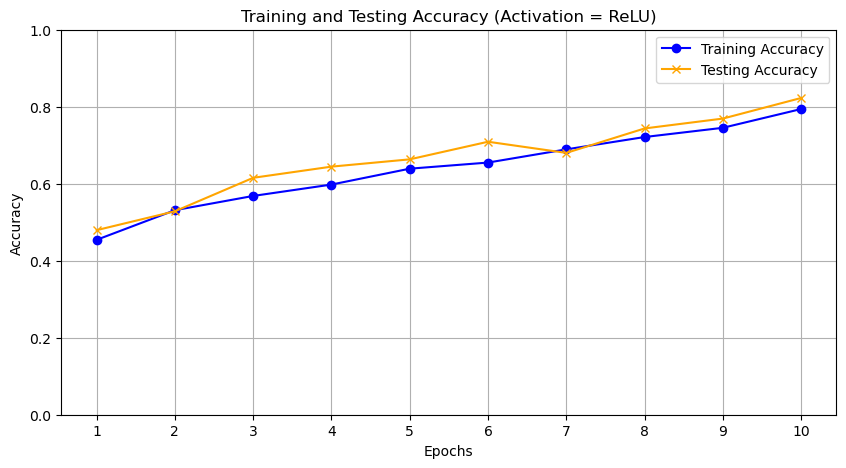


Training with activation function: LeakyReLU


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.4119, Test Accuracy: 0.4961
Epoch [2/10], Train Accuracy: 0.5201, Test Accuracy: 0.5608
Epoch [3/10], Train Accuracy: 0.5691, Test Accuracy: 0.6143
Epoch [4/10], Train Accuracy: 0.6073, Test Accuracy: 0.5831
Epoch [5/10], Train Accuracy: 0.6014, Test Accuracy: 0.6656
Epoch [6/10], Train Accuracy: 0.6580, Test Accuracy: 0.6878
Epoch [7/10], Train Accuracy: 0.6845, Test Accuracy: 0.7157
Epoch [8/10], Train Accuracy: 0.7344, Test Accuracy: 0.7949
Epoch [9/10], Train Accuracy: 0.7645, Test Accuracy: 0.8261
Epoch [10/10], Train Accuracy: 0.8317, Test Accuracy: 0.8317


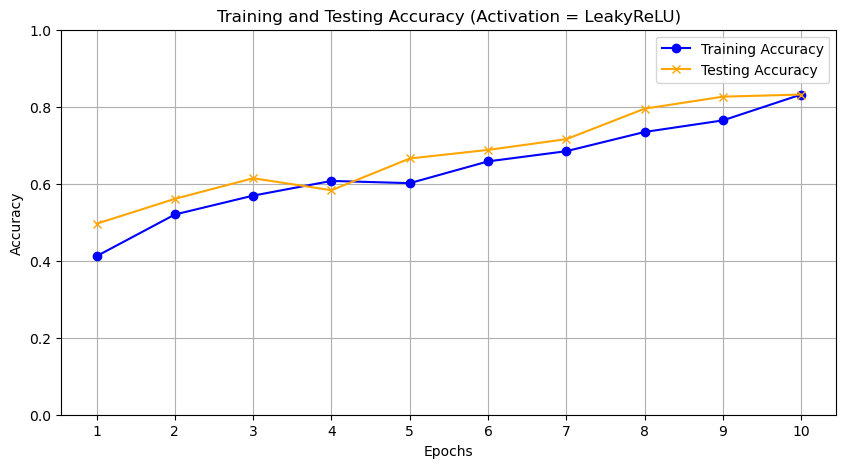


Training with activation function: Tanh


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.4390, Test Accuracy: 0.5151
Epoch [2/10], Train Accuracy: 0.5234, Test Accuracy: 0.5507
Epoch [3/10], Train Accuracy: 0.5641, Test Accuracy: 0.5652
Epoch [4/10], Train Accuracy: 0.5939, Test Accuracy: 0.5329
Epoch [5/10], Train Accuracy: 0.5956, Test Accuracy: 0.5273
Epoch [6/10], Train Accuracy: 0.6254, Test Accuracy: 0.5652
Epoch [7/10], Train Accuracy: 0.6441, Test Accuracy: 0.7157
Epoch [8/10], Train Accuracy: 0.7152, Test Accuracy: 0.6934
Epoch [9/10], Train Accuracy: 0.7776, Test Accuracy: 0.8038
Epoch [10/10], Train Accuracy: 0.8434, Test Accuracy: 0.8250


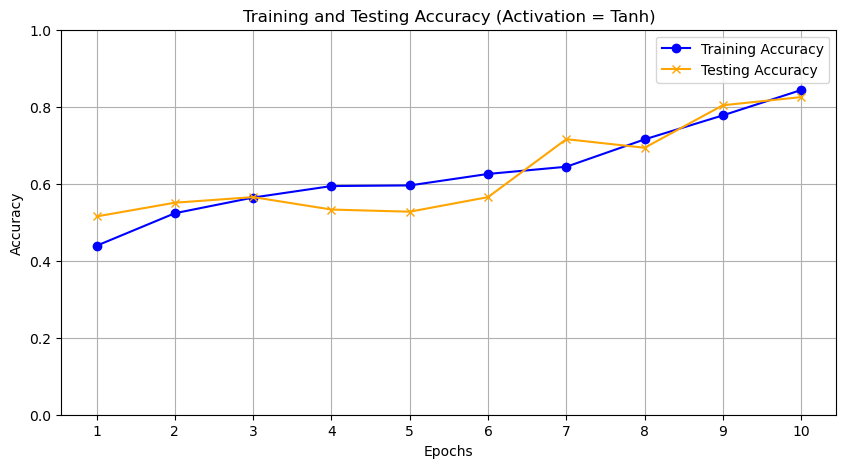


Training with activation function: Sigmoid


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Train Accuracy: 0.3264, Test Accuracy: 0.2999
Epoch [2/10], Train Accuracy: 0.3467, Test Accuracy: 0.2999
Epoch [3/10], Train Accuracy: 0.3269, Test Accuracy: 0.3634
Epoch [4/10], Train Accuracy: 0.3342, Test Accuracy: 0.3367
Epoch [5/10], Train Accuracy: 0.3311, Test Accuracy: 0.3367
Epoch [6/10], Train Accuracy: 0.3386, Test Accuracy: 0.2999
Epoch [7/10], Train Accuracy: 0.3378, Test Accuracy: 0.3367
Epoch [8/10], Train Accuracy: 0.3420, Test Accuracy: 0.3634
Epoch [9/10], Train Accuracy: 0.3135, Test Accuracy: 0.2999
Epoch [10/10], Train Accuracy: 0.3370, Test Accuracy: 0.3634


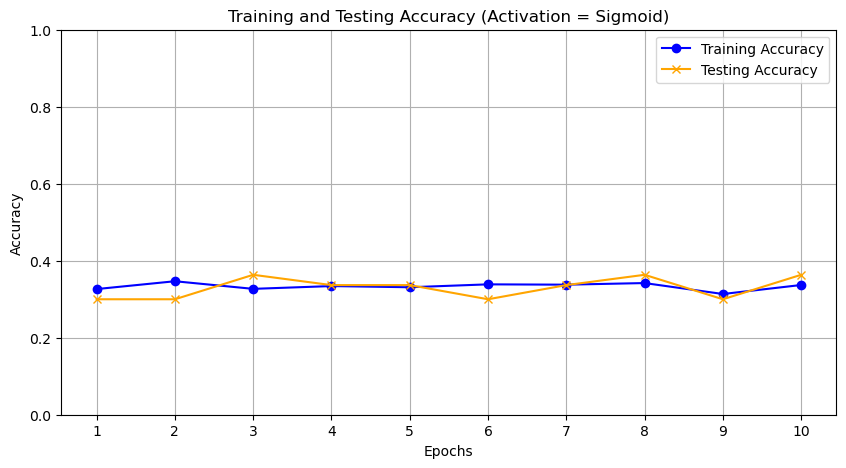

In [17]:
# Define CNN model with customizable activation function
class CNN(nn.Module):
    def __init__(self, activation_func):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 12 * 12, 512)
        self.fc2 = nn.Linear(512, 3)  # 3 classes: cherry, strawberry, tomato
        self.activation_func = activation_func  # Store activation function

    def forward(self, x):
        x = self.pool(self.activation_func(self.conv1(x)))
        x = self.pool(self.activation_func(self.conv2(x)))
        x = self.pool(self.activation_func(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.activation_func(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train and evaluate the model with different activation functions
def train_and_evaluate(model, train_loader, test_loader, optimizer, num_epochs=10, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    
    # Initialize optimizer
    if optimizer == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    elif optimizer == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    else:
        raise ValueError("Optimizer not supported.")

    train_set_scores = []
    test_set_scores = []

    for epoch in tqdm(range(num_epochs), desc='Training'):
        model.train()
        correct = 0
        total = 0
        
        # Training step
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backward pass (compute gradients)
            optimizer.step()  # Update weights

            # Calculate training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = correct / total
        train_set_scores.append(train_accuracy)

        # Testing step
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = correct / total
        test_set_scores.append(test_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return train_set_scores, test_set_scores

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Function to run experiments with different activation functions
def experiment_with_activations(activations, optimizer='Adam', num_epochs=10):
    for activation in activations:
        print(f'\nTraining with activation function: {activation.__class__.__name__}')
        
        # Data loaders
        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
        test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

        # Initialize model with the selected activation function
        model = CNN(activation).to(device)
        
        # Train and evaluate
        train_scores, test_scores = train_and_evaluate(model, train_loader, test_loader, optimizer, num_epochs=num_epochs)
        
        # Plotting the training and testing accuracy over epochs for the current activation function
        epochs = list(range(1, num_epochs + 1))
        plt.figure(figsize=(10, 5))
        plt.plot(epochs, train_scores, label='Training Accuracy', marker='o', color='blue')
        plt.plot(epochs, test_scores, label='Testing Accuracy', marker='x', color='orange')
        plt.title(f'Training and Testing Accuracy (Activation = {activation.__class__.__name__})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.xticks(epochs)
        plt.ylim(0, 1)
        plt.grid()
        plt.legend()
        plt.show()

# Specify different activation functions to experiment with
activations = [nn.ReLU(), nn.LeakyReLU(), nn.Tanh(), nn.Sigmoid()]
experiment_with_activations(activations, optimizer='Adam', num_epochs=10)